# Polynomial regression 
### Linear and polynomial regression with the SALARY dataset
You'll be using different types of regression to predict the salary of employes, based on historical salaries.

**1. Importing modules needed for the work**

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

**2. Importing the salary data**

In [2]:
dataset=pd.read_csv('./input/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


We can see that the dataset has 10 levels and the corresponding salary paid to the employee

> #### We only have one usable feature in this dataset
> The features 'Position' and 'Level' are redundant.
> The **regressor** is the column 'Level'

In [3]:
# extracting the regressor/column/feature 'Level'
X=dataset.iloc[:,1:2].values  
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

> #### We now need to extract the regressand, that is the variable that we eventually want to be able to predict
> the **regressand** is the column 'Salary'

In [4]:
# Extracting the column 'Salary'
y=dataset.iloc[:,2].values    
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

**3. Splitting the data into training and test data**
> Typically at this point we should be splitting the dataset into train and test set. So that we can test out our model after training. However in this simple example we only have few data points. So we´ll be using all of them for training. 

> **This is a very bad thing to do!!**


In [5]:
# uncomment the following to create the training and testing datasets
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**4. Linear Regression**

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

**5. Visualizing Linear Regression result**

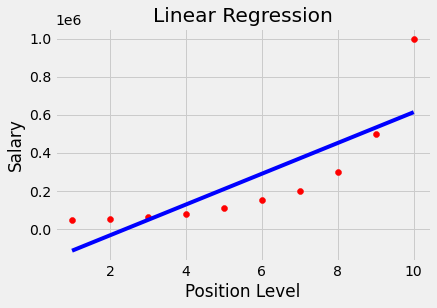

In [7]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**6. Polynomial Regression**<br>
Since our data is distributed in a non linear way, we'll try fitting it with polynomial curves, to get more accurate models.<br>
We achieve this through a stratagem. First, we **transform the features from a linear space onto a polynomial space**. Then we **apply linear regression to the transformed dataset**. <br>
Let us see how we can fit a polynomial of degree 2. In this case, we transfrom the $X$ (feature) space onto a $X^{2}$ space, using the following **Polynomial Feature Transform**: <br>
*PolynomialFeatures(degree=2)*

>***Definition***: Polynomial features are those features created by raising existing features to an exponent.
For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in $X$, e.g. $X^{2}$. 

In [8]:
# imports
from sklearn.preprocessing import PolynomialFeatures

# creating a polynomial feature of degree 2
poly_reg2=PolynomialFeatures(degree=2)

# transforming feature X into X^2
X_poly=poly_reg2.fit_transform(X)
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [9]:
# creating a linear regression handler
lin_reg_2=LinearRegression()

# applying linear regression to the transformed X^2 space
# this is equivalent to fitting a polynomial of degree 2 to the orginal X space
lin_reg_2.fit(X_poly,y)

LinearRegression()

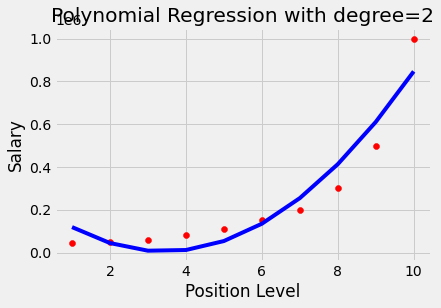

In [10]:
# plotting the original data points
plt.scatter(X,y,color='red')

# plotting the polynomial of degree 2
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')

# uncomment the next line to plot the polynomial of degree 3
#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')

plt.title('Polynomial Regression with degree=2')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**7. Third-degree Polynomial Regression**<br>
Since our data is still not fitting very well, we'll try fitting it with a higher-degree polynomial (degree=3), to get more accurate models.

In [11]:
# Polynomial curve of degree 3
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression()

**8. Visualizing third-degree polynomial**

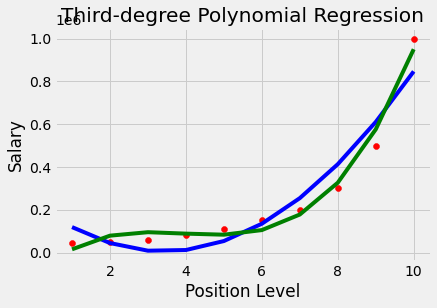

In [12]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Third-degree Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**8. Predicting the salary of an employee with each of the 3 curves**
Let´s use the three models to make predictions, to get a feel as to the accuracy we have achieved.
> We now want to predict the salary of an employee comprised into a new level 6.5 

In [13]:
lin_reg.predict([[6.5]])  # We are assuming the level of the employee is 6.5

array([330378.78787879])

In [14]:
lin_reg_2.predict(poly_reg2.fit_transform([[6.5]]))

array([189498.10606061])

In [15]:
lin_reg_3.predict(poly_reg3.fit_transform([[6.5]]))

array([133259.46969697])

We can clearly see that the Polynomial Regression models fit much better, compared to the Linear Regression Model. As we increase the degree of the polynomial regression the correlation increases. **Linear regression overshoots** by a large amount, ending up with a 6.5-level employee that is predicted to earn much more than the actual salary of a 7-level employee. **Not a good model!!**

> At the end of this notebook, you are required to compute the errors of each of the models more accurately, looking at the metrics introduced in one of the earlier notebooks.


## Overfitting and underfitting

**You should not be tempted into using high-degree polynomials though!!**

We always need to aim for the minimal possible degree (linear regression when possible), which has two benefits:<br>
* it is much faster to compute (particularly on big datasets)
* it avoids over-fitting

Look at the following example to appreciate the problem at hand in a qualitative way.

![PA Work Flow](./figures/underfitting_and_overfitting.png)
